# `HF_classification . blanchefort . rubert-base-cased-sentiment-rusentiment . Extensive experiments . Saved model` notebook
### Descriprion
This notebook is one of those which were used to training large DL models from `transformers` library and measuring classification performance. Experiments with **rubert-base** model was conducted here. The model was profoundly explored via local resources and usage of Yandex.DataSphere platform. 

In [195]:
#!g2.mig
%pwd

'/home/jupyter/work/resources/nlp-coursework'

In [8]:
#!g2.mig
%cd ../../..

/home/jupyter/work/resources/nlp-coursework


In [9]:
#!g2.mig
%pip install numpy==1.21

Defaulting to user installation because normal site-packages is not writeable
^C
ERROR: Operation cancelled by user


In [10]:
#!g2.mig
from datasets_ import DatasetLoader
from src.nlp.application import BertClassifier, ReviewDataset

from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from transformers import AdamW

from tqdm import tqdm
import numpy as np
import pandas as pd

import sys

from nltk import WhitespaceTokenizer

from transformers import (
    pipeline,                       
    AutoModelForSequenceClassification,                       
    BertForSequenceClassification,                       
    AutoTokenizer,
    AdamW,
)

In [11]:
#!g2.mig
train, test = DatasetLoader.load_reviews_Review_Label_dataset(train_test_split=True,
                                                              classnames_to_int=True,
                                                              remove_neutral_class=True,
                                                              show_path=True,)
train.label[train['label'] == 2] = 1
test.label[test['label'] == 2] = 1

print(train.label.value_counts())
train = pd.concat([train, resample(train[train.label == 0], n_samples=41608, random_state=42)])
print(train.label.value_counts())

print(train.shape, test.shape)

data/reviews_Review_Label/reviews_Review_Label.csv
Dataset 'reviews_Review_Label.csv' was found in local storage.
label
1    48477
0     6869
Name: count, dtype: int64
label
0    48477
1    48477
Name: count, dtype: int64
(96954, 2) (23721, 2)


In [12]:
#!g2.mig
test

,review,label
25749,Большое количество фильмов советского кинемато...,1
44489,"Тяжело ответить на вопрос, что же такое Догвил...",1
53162,"В наше время такие героини, как скажем наприме...",0
25843,В 2001 году нам довелось познакомиться с новой...,1
44609,"«Это фильм?», «У них не хватило денег на декор...",1
...,...,...
14104,"- Через столько лет?- ВсегдаБезусловно, истори...",1
22232,"После просмотра трейлера, я был под большим вп...",1
73314,"Многие не верят, но я легко подключаюсь к прои...",1
47848,"Как часто нам нужна поддержка? Да, пожалуй, оч...",1


In [13]:
#!g2.mig

clf = BertClassifier('blanchefort/rubert-base-cased-sentiment-rusentiment')

train_dataset = ReviewDataset(train.review, train.label, clf.tokenizer)
test_dataset = ReviewDataset(test.review, test.label, clf.tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

Downloading:   0%|          | 0.00/952 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/679M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [8]:
#!g2.mig

for param in clf.model.bert.parameters():
    param.requires_grad = False
print('All parameters:', sum(p.numel() for p in clf.model.parameters()))
print('Trainable parameters:', sum(p.numel() for p in clf.model.parameters() if p.requires_grad))

All parameters: 177854978
Trainable parameters: 1538


In [9]:
#!g2.mig

clf.model.device

device(type='cuda', index=0)

In [11]:
#!g2.mig

clf.train(1, train_dataloader, test_dataloader, pretrain_test=True)

  0%|                                                                      | 0/1483 [00:00<?, ?it/s]

  0%|                                                                      | 0/6060 [00:00<?, ?it/s]

  0%|                                                                      | 0/1483 [00:00<?, ?it/s]

Pre-training test:
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2979
           1       0.85      0.82      0.84     20742

    accuracy                           0.72     23721
   macro avg       0.43      0.41      0.42     23721
weighted avg       0.74      0.72      0.73     23721

Test loss 0.6365046148676368 accuracy 0.7180557312086336
----------
Epoch 1/1
Train loss 0.3308159988896042 accuracy 0.8562823607071395
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.69      2979
           1       0.97      0.94      0.95     20742

    accuracy                           0.92     23721
   macro avg       0.80      0.85      0.82     23721
weighted avg       0.92      0.92      0.92     23721

Test loss 0.2107675949014869 accuracy 0.9153914253193373
----------


Text(0, 0.5, 'Train Loss')

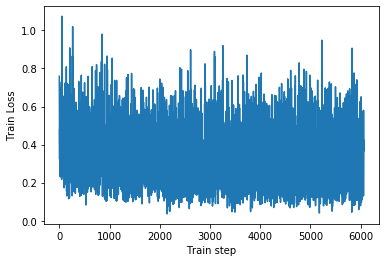

In [30]:
#!g2.mig

plt.plot(clf.all_losses)
plt.xlabel('Train step')
plt.ylabel('Train Loss')

In [21]:
#!g2.mig
import dill

with open('clf', 'wb') as f:
    dill.dump(clf, f)

In [ ]:
#!g2.mig
import dill

with open('clf', 'rb') as f:
    clf = dill.load(f)

In [15]:
#!g2.mig
clf.optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.001
    lr: 0.001
    weight_decay: 0
)

In [16]:
#!g2.mig

clf.optimizer = torch.optim.Adam(clf.model.parameters(), lr=5e-5)
clf.optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)

In [17]:
#!g2.mig

for param in clf.model.bert.parameters():
    param.requires_grad = True
print('All parameters:', sum(p.numel() for p in clf.model.parameters()))
print('Trainable parameters:', sum(p.numel() for p in clf.model.parameters() if p.requires_grad))

All parameters: 177854978
Trainable parameters: 177854978


In [ ]:
#!g2.mig

clf.train(1, train_dataloader, test_dataloader, pretrain_test=False)

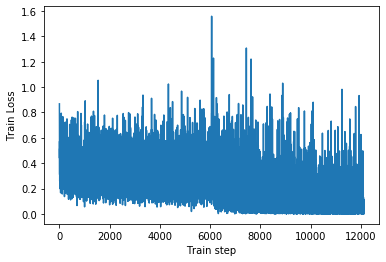

In [166]:
#!g2.mig

plt.plot(clf.all_losses)
plt.xlabel('Train step')
plt.ylabel('Train Loss')

plt.show()

In [170]:
#!g2.mig
clf.optimizer = torch.optim.Adam(clf.model.parameters(), lr=1e-5)
clf.optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 1e-05
    weight_decay: 0
)

In [171]:
#!g2.mig
clf.train(1, pretrain_test=False)

100%|█████████████████████████████████████████████| 6060/6060 [56:31<00:00,  1.79it/s, loss=0.00553]
Train loss 0.010916641023597157 accuracy 0.9972564308847495
100%|█████████████████████████████████████████████| 1483/1483 [05:15<00:00,  4.70it/s, loss=0.00306]
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      2979
           1       0.96      0.99      0.97     20742

    accuracy                           0.95     23721
   macro avg       0.93      0.84      0.88     23721
weighted avg       0.95      0.95      0.95     23721

Test loss 0.3306930817049535 accuracy 0.95307954976603
----------


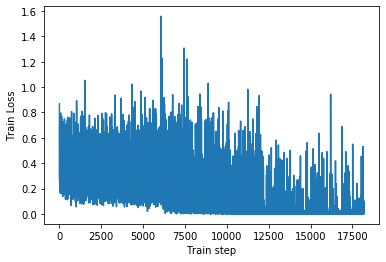

In [172]:
#!g2.mig

plt.plot(clf.all_losses)
plt.xlabel('Train step')
plt.ylabel('Train Loss')

plt.show()

In [169]:
#!g2.mig
import dill

with open('models/clf.model', 'wb') as f:
    dill.dump(clf, f)

In [175]:
#!g2.mig
clf.tokenizer.save_pretrained('models/overfitted')
clf.model.save_pretrained('models/overfitted')

In [188]:
#!g2.mig
clf.model.config

BertConfig {
  "_name_or_path": "models/overfitted",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEUTRAL",
    "1": "POSITIVE",
    "2": "NEGATIVE"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEGATIVE": 2,
    "NEUTRAL": 0,
    "POSITIVE": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.14.0",
  "type_